<a href="https://colab.research.google.com/github/Carlogui/IMEC_4434/blob/main/Upegui_Carlos__CureKinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>

<br>

<font color='black' align="center"><h1> </h1></font>

<font color='black'><h1 align="center">IMEC 4434 - Multi Scale Manufacturing of Composites</h1></font>

<font color='black'><h1 align="center">Professor: Clemens Dransfeld</h1></font>

<font color='black'><h1 align="center">Cure Kinetics</h1></font>

<font color='black'><h1 align="center">Carlos Ernesto Upegui - 202213004</h1></font>

<br>

<br>

<font color='black'><center>July 24 2025<br>Summer Course <br>Bogotá DC – Colombia </center><br></font>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from pandas import read_csv
from pandas import read_excel
import scipy
from scipy import integrate
from scipy.optimize import minimize
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import least_squares
from google.colab import drive
import matplotlib as mpl
import urllib.request
import os
from scipy import integrate
import gdown, zipfile

In [59]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cure Kinetics exercise

#### Authors

### As it was explained during the lectures, a significant part of research in composites manufacturing is involved in analyzing curing processes of thermoset polymers.Thermoset resins, such as epoxy, undergo a curing process driven by chemical reactions. These reactions result in the creation of covalent bonds among monomers, ultimately forming polymer chains. This curing process is quantified by the parameter known as the 'degree of cure,' denoted as $\alpha$. Initially, in the absence of any covalent bonds, the material consists solely of individual monomers. In this scenario, it can be asserted that no bonding has occurred, resulting in $\alpha = 0$. However, upon the addition of a hardener, the monomers initiate the formation of polymer chains through the establishment of covalent bonds. When all the monomers have become part of polymer chains through these covalent bonds, it is deemed that the degree of cure has reached its maximum, $\alpha = 1$

### Chemical reactions occur through contact of two active groups belonging to different molecules (for example of epoxy and of a hardener). Elevated cure temperatures are essential to trigger and maintain the chemical reactions responsible for converting the thermoset into a fully cured state. Whenever resin and hardener molecules (after mixing) are provided with more kinetic energy, they are more likely to shift and collide with neighbouring molecules, increasing the chances of curing reactions. Additionally, when more time is given to two reactants, the probability of a necessary collision for bonding increases. As a result, these phenomena are highly influenced by resin chemistry, catalyst reactivity, cure temperature, and the presence of inhibitors or accelerators.

### Therefore, we can say that the degree of cure $\alpha$ is a function of both temperature and time. $$\alpha = f(T,t)$$

#### Cure kinetics is concerned with the rates of the chemical reactions in a curing process. This is relevant, since the cure kinetics can help predict the thermoset cure and therefore also determines the manufacturing process and (partially) the final material properties. When cure kinetics are understood, they can be used to predict the degree of cure $\alpha$ of a certain process. To make this type of prediction, DSC measurement data can be used.

#### Before starting to work on the questions and to achieve a better understanding of the topic, it is highly recommended for you to read the paper provided with this notebook (Kailong Jin, William H. Heath, John M. Torkelson, Kinetics of multifunctional thiol-epoxy click reactions studied by differential scanning calorimetry: Effects of catalysis and functionality. Polymer. 2015; 81: 70-78).

## Question 1 (1 point)

#### Differential Scanning Calorimetry (DSC) experiments are frequently used to evaluate the cure kinetics parameters involved in the curing of thermosets. To show this correlation, three tests were performed in isothermal conditions for the polymerization of a thermoset at three different temperatures. The .xlsx files which contain these raw isothermal DSC measurements were attached to this notebook.
#### In the cell below, plot the relevant DSC measurement data for all of the three cases in a single figure. Don't forget to label the axis (ylabel = H[W/g], xlabel=t[min]).
#### NOTE:
#### 1. The unit used for heat flow data in the .xlsx files is [mW/s].
#### 2. The weights for the specimens are mentioned in the respective .xlsx files.
#### 3. Data analysis needs to be carried out in order to determine what is relevant and what is machine data/noise. Carry out cleaning of data if necessary. Mention the steps followed (if applicable) as part of your answers.

In [60]:
base_path = '/content/drive/MyDrive/filescolab/'

In [61]:
# Colors:
main_color = '#ff6d01'
analog_color1 = '#ffa600'  # lighter orange
analog_color2 = '#ff6da1'  # pinkish
complementary_color = '#01aaff'  # cyan/blue

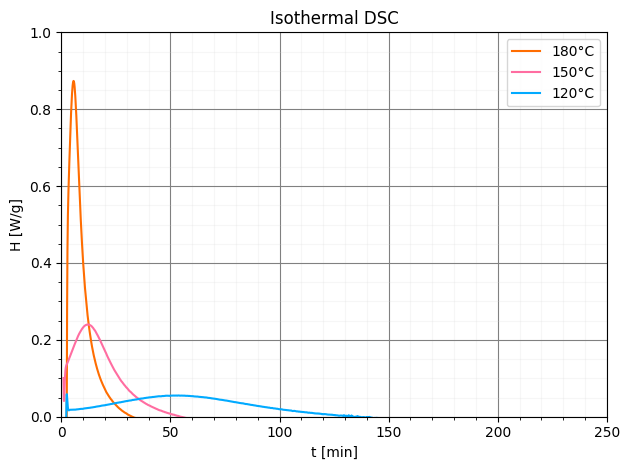

In [62]:
# Read  file
LME_0_11 = pd.read_csv(base_path + 'LME_0_11_test.csv', names=['Time', 'Flow', 'Temp'], header=0)

# sample 1
LME_0_11_weight = 14.4  # Sample weight in milligrams

# Convert Flow to normalized heat flow (W/g)
LME_0_11['wg'] = LME_0_11['Flow'] / LME_0_11_weight

# Store time in seconds
LME_0_11['s'] = LME_0_11['Time']

# Sample 2:
LME_0_12b_weight = 10.4  # Sample weight in milligrams

LME_0_12b = pd.read_csv(base_path + 'LME_0_12b_test.csv', names=['Time', 'Flow', 'Temp'], header=0)

LME_0_12b['wg'] = LME_0_12b['Flow'] / LME_0_12b_weight

LME_0_12b['s'] = LME_0_12b['Time']

# Sapmle 3
LME_0_13_weight = 13.7  # Sample weight in milligrams

LME_0_13 = pd.read_csv(base_path + 'LME_0_13_test.csv', names=['Time', 'Flow', 'Temp'], header=0)

LME_0_13['wg'] = LME_0_13['Flow'] / LME_0_13_weight

LME_0_13['s'] = LME_0_13['Time']


# plot
plt.figure()
plt.plot(LME_0_11['s'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)], LME_0_11['wg'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)], color = main_color)
plt.plot(LME_0_12b['s'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)], LME_0_12b['wg'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)], color=analog_color2)
plt.plot(LME_0_13['s'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)], LME_0_13['wg'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)], color = complementary_color)
plt.legend(['180°C', '150°C', '120°C'])
plt.title('Isothermal DSC')
plt.ylabel('H [W/g]')
plt.xlabel('t [min]')
plt.xlim(0, 250)
plt.ylim(0, 1)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()


## Question 2 (2 points)

#### After visualizing the heat generation curves, explain why and how isothermal DSC measurement data can be related to the curing rate of a thermoset resin. Why is there a peak and what can it be related to?

Isothermal DSC data gives insight into how much heat the instrument needs to supply to keep a sample at a constant temperature. Since curing a thermoset resin is an exothermic process, the material itself releases heat as it cures. This released heat helps keep the sample warm, so the DSC machine doesn’t have to add as much heat compared to an inert reference.

The faster the resin cures, the more heat is released in a short amount of time. This is reflected in the DSC signal: a higher heat flow means a faster reaction.

The peak in the DSC curve shows the moment when the reaction is most intense—the point at which the resin is releasing the most heat per unit time. In other words, this is when the curing rate is at its maximum.

## Question 3 (4 points)

#### As mentioned, the just plotted isothermal DSC data  can be used to obtain an estimation of degree of cure $\alpha$ vs. time $t$. To do so, it first has to be assumed that the heat flow is proportional to the degree of cure.  $$\Delta H_{max} \equiv \alpha = 1$$
#### Where  $\Delta H_{max} $ identifies the maximum total heat of reaction found for the three DSC measurements.
#### $\Delta H_{max} = max(\Delta H_{max_{120}}, \Delta H_{max_{150}}, \Delta H_{max_{180}})$
#### Overall, the formula above expresses how the total generated heat flow while curing corresponds to a complete degree of cure for the reaction (100%).
#### Then, this assumption is used to normalize the heat flow measurement. This normalized heat flow can now be related to the curing rate. $$\frac{d\alpha}{dt} = \frac{1}{\Delta H_{max}} \frac{dH(t)}{dt}$$
#### Finally, integrating this result leads to the relationship of the degree of cure $\alpha$ vs. time $t$.

#### Use the assumptions and information provided above to plot the degree of cure $\alpha$ vs. time $t$, using the provided data. Plot all cases in a single figure. Make sure to plot over a time interval which suits the results, include a legend and axes labels with units.

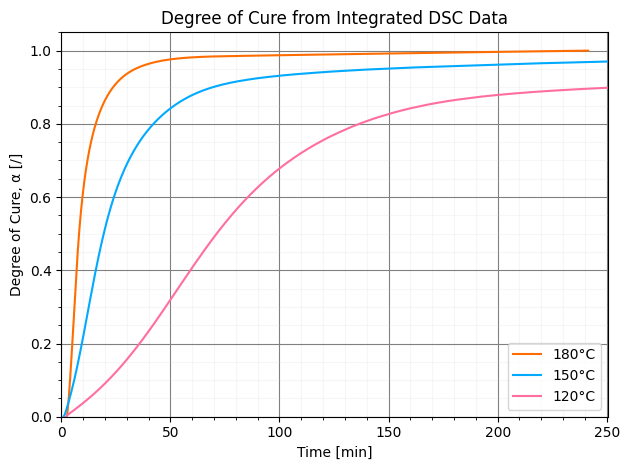

In [63]:
# Sample 1: LME_0_11 180°C
#time and heat flow per gram over the interval
time_norm11 = LME_0_11['s'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)]
wg_fornorm11 = LME_0_11['wg'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)]

# heat integral (cure) array
cure11 = np.zeros(len(wg_fornorm11))
for i in range(len(cure11)):
    if i > 0:
        # Trapezoidal integration using shifted indices (manual offset)
        cure11[i] = cure11[i-1] + (
            wg_fornorm11[i+59] + wg_fornorm11[i+58] + 0.8 / LME_0_11_weight
        ) / 2 * (time_norm11[i+59] - time_norm11[i+58])

# Normalize the cure curve between 0 and 1
a = min(cure11)
b = max(cure11)
norm11 = (cure11 - a) / (b - a)

# Sample 2 150:
time_norm12 = LME_0_12b['s'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)]
wg_fornorm12 = LME_0_12b['wg'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)]

cure12 = np.zeros(len(wg_fornorm12))
for i in range(len(cure12)):
    if i > 0:
        cure12[i] = cure12[i-1] + (
            wg_fornorm12[i+31] + wg_fornorm12[i+30] + 0.64 / LME_0_12b_weight
        ) / 2 * (time_norm12[i+31] - time_norm12[i+30])

norm12 = (cure12 - a) / (b - a)

# sample 3 120 deg
time_norm13 = LME_0_13['s'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)]
wg_fornorm13 = LME_0_13['wg'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)]

cure13 = np.zeros(len(wg_fornorm13))
for i in range(len(cure13)):
    if i > 0:
        cure13[i] = cure13[i-1] + (
            wg_fornorm13[i+79] + wg_fornorm13[i+78] + 0.54 / LME_0_13_weight
        ) / 2 * (time_norm13[i+79] - time_norm13[i+78])

norm13 = (cure13 - a) / (b - a)

#  Plot normalized degree of cure for all three samples
plt.figure()
plt.plot(time_norm11, norm11, color = main_color)
plt.plot(time_norm12, norm12, color = complementary_color)
plt.plot(time_norm13, norm13, color = analog_color2)
plt.legend(['180°C', '150°C', '120°C'])
plt.title('Degree of Cure from Integrated DSC Data')
plt.ylabel('Degree of Cure, α [/]')
plt.xlabel('Time [min]')
plt.xlim(0, 250.5)
plt.ylim(0, 1.05)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

## Question 4 (4 points)

#### Question 4.1: In the previous question you have generated graphs illustrating the relationship between the degree of cure $\alpha$ and time t for three isothermal DSC measurements carried out at different temperatures. Provide your analysis regarding the maximum degree of cure visible in the generated graphs. Can you explain the correlation between the final degree of cure and cure temperature?

When a high isothermal temperature is applied, the monomers gain higher kinetic energy, enabling them to react rapidly before significant polymer chains or crosslinks have formed. This early reactivity leads to a high degree of conversion in a short period.

In contrast, at lower temperatures, the reaction proceeds more slowly. This allows longer polymer chains and crosslinks to form earlier in the process, which reduces the mobility of reactive species. As a result, monomers encounter greater difficulty in finding reactive partners, requiring more time to reach the same degree of cure, and often resulting in a lower final conversion due to incomplete polymerization.

#### Question 4.2 : A graph correlating the degree of cure $\alpha$ with cure time for isothermal cure cycles at six different cure temperatures is shown in the figure below. Compare your graph made in Question 3 with the given figure. Describe two similarities and at least one difference. Provide a potential reason for the difference(s) you observed.

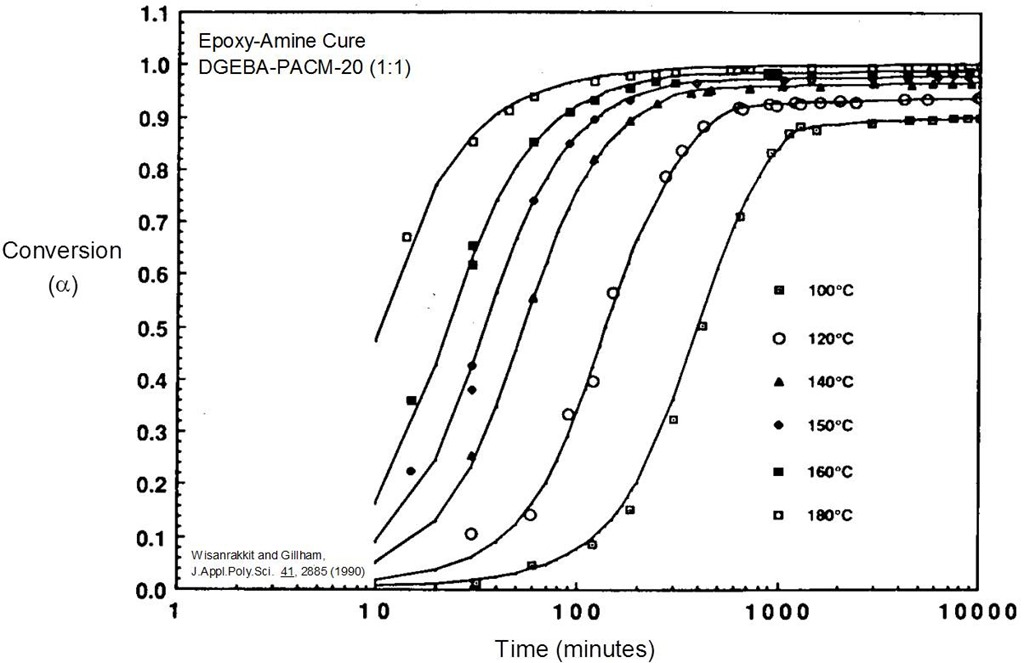

Conversion vs. ln(time) curves for an epoxy-amine system. From Wisanrakkit and Gillham, J. Appl. Poly. Sci. 42, 2453 (1991)

Similarities:
Faster Cure at Higher Temperatures: In both datasets, higher isothermal curing temperatures result in a shorter time to reach the maximum degree of cure. This reflects the increased reaction rate due to thermal activation.

Typical Curing Profile: All curves follow a similar curing trend: a rapid initial reaction phase followed by a slower approach to saturation, as the reaction progresses toward completion and diffusion becomes limiting.

Differences:

Time Scale Variation: The maximum curing time in our results is around 250 minutes, whereas for DGEBA-PACM-20 at lower curing temperatures, curing extends to nearly 1000 minutes, indicating a slower overall reaction possibly due to differences in formulation or reactivity.

## Question 5 (7 points)

#### Several cure kinetics models were formulated to predict and simulate experimental cure profiles of thermosetting resins in terms of curing rate. You will be putting to test one of the most widely used ones: the Kamal-Sourour model (shown below) $$\frac{d\alpha}{dt} = (k_1 + k_2 \cdot \alpha^m)(1 - \alpha)^n$$
#### Where $k_1$ and $k_2$ are rate constants, and  $m$ and $n$ are reaction orders.
#### The reaction rate constants $k_1$ and $k_2$ strongly depend on cure temperature and follow an Arrhenius type relation, as shown by the equation:
$$k_i = A_i \cdot exp(-\frac{E_i}{RT})$$
$$i=1,2$$
#### Where the pre-exponential factor $A_i$ represents a constant, $E_i$ is the activation energy (mol/J), R is the molar gas constant and T is the cure temperature.

#### Question 5.1: Using the experimental isothermal DSC data used in Question 1, you will set up the cure kinetics of the resin based on the Kamal Sourour model. To estimate the intial activation energy $E_1$ and $A_1$, plot $ln\left(\frac{d\alpha}{dt}\right)$ vs $\frac{1}{T}$ for a low degree of cure based on the three DSC measurements given. Calculate $E_1$ and $A_1$ based on the graph.

#### Hint: $\alpha \approx 0$

/tmp/ipython-input-64-1112488746.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A_180 = np.trapz(H_180, t_180)
/tmp/ipython-input-64-1112488746.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A_150 = np.trapz(H_150, t_150)
/tmp/ipython-input-64-1112488746.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A_120 = np.trapz(H_120, t_120)


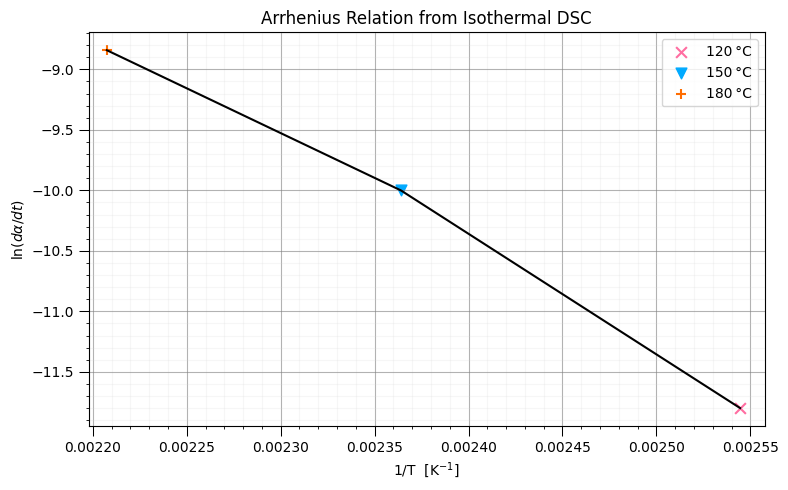

Activation Energy E1: 73197.13 J/mol
A1: 43014.54


In [64]:

# Sample weights
weight_180 = 14.4
weight_150 = 10.4
weight_120 = 13.7

# Normalize heat flow (W/g)
LME_0_11['wg'] = LME_0_11['Flow'] / weight_180
LME_0_12b['wg'] = LME_0_12b['Flow'] / weight_150
LME_0_13['wg'] = LME_0_13['Flow'] / weight_120

# Filter times in seconds
t_180 = LME_0_11['Time'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)].values * 60
H_180 = LME_0_11['wg'][(LME_0_11['Time'] > 2.48) & (LME_0_11['Time'] < 250)].values
t_150 = LME_0_12b['Time'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)].values * 60
H_150 = LME_0_12b['wg'][(LME_0_12b['Time'] > 1) & (LME_0_12b['Time'] < 250)].values
t_120 = LME_0_13['Time'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)].values * 60
H_120 = LME_0_13['wg'][(LME_0_13['Time'] > 2.2) & (LME_0_13['Time'] < 250)].values

# Total area (enthalpy)
A_180 = np.trapz(H_180, t_180)
A_150 = np.trapz(H_150, t_150)
A_120 = np.trapz(H_120, t_120)
h_max = max(A_180, A_150, A_120)

# Derivatives of alpha
dadt_180 = H_180 / (h_max * weight_180)
dadt_150 = H_150 / (h_max * weight_150)
dadt_120 = H_120 / (h_max * weight_120)

# Alpha curves by integration
alpha_180 = np.zeros_like(dadt_180)
alpha_150 = np.zeros_like(dadt_150)
alpha_120 = np.zeros_like(dadt_120)

alpha_180[0] = 0
alpha_150[0] = 0
alpha_120[0] = 0
for i in range(1, len(alpha_180)):
    alpha_180[i] = alpha_180[i-1] + dadt_180[i-1]
for i in range(1, len(alpha_150)):
    alpha_150[i] = alpha_150[i-1] + dadt_150[i-1]
for i in range(1, len(alpha_120)):
    alpha_120[i] = alpha_120[i-1] + dadt_120[i-1]

# Low alpha analysis
low_alpha = 0.001
idx_180 = np.abs(alpha_180 - low_alpha).argmin()
idx_150 = np.abs(alpha_150 - low_alpha).argmin()
idx_120 = np.abs(alpha_120 - low_alpha).argmin()

dadt_vals = np.array([dadt_120[idx_120], dadt_150[idx_150], dadt_180[idx_180]])
alpha_vals = np.array([alpha_120[idx_120], alpha_150[idx_150], alpha_180[idx_180]])
T_vals = np.array([393, 423, 453])  # Temperatures in Kelvin
inv_T = 1 / T_vals

# Plot
plt.figure(figsize=(8, 5))
plt.plot(inv_T, np.log(dadt_vals), color='black', linewidth=1.5)
plt.scatter(inv_T[0], np.log(dadt_vals[0]), color=analog_color2, marker='x', s=60, label='120 °C')
plt.scatter(inv_T[1], np.log(dadt_vals[1]), color=complementary_color, marker='v', s=60, label='150 °C')
plt.scatter(inv_T[2], np.log(dadt_vals[2]), color=main_color, marker='+', s=60, label='180 °C')

plt.title('Arrhenius Relation from Isothermal DSC')
plt.xlabel(r'1/T  [K$^{-1}$]')
plt.ylabel(r'$\ln(d\alpha/dt)$')
plt.xlim(1/455, 1/391)
plt.legend()

# Grid and style
plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
plt.grid()
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# Linear fit
slope, intercept = np.polyfit(inv_T, np.log(dadt_vals), 1)
Ea = -slope * 8.314  # Activation energy in J/mol
A1 = np.exp(intercept)

print(f"Activation Energy E1: {round((-slope*8.314),2)} J/mol")

print(f"A1: {round(np.exp(intercept),2)}")

In [65]:
alpha180 = alpha_180

dadt180 = dadt_180

alpha120 = alpha_120

dadt120 = dadt_120

In [70]:
eps = 1e-10

alpha180 = np.clip(alpha180, 0.0, 1.0 - eps)

alpha120 = np.clip(alpha120, 0.0, 1.0 - eps)

dadt180 = np.gradient(alpha180, time180)

dadt120 = np.gradient(alpha120, time120)

mask180 = np.isfinite(dadt180)

mask120 = np.isfinite(dadt120)

alpha180, dadt180 = alpha180[mask180], dadt180[mask180]

alpha120, dadt120 = alpha120[mask120], dadt120[mask120]

#equations
def arrhenius(E, A, T):

    R = 8.314

    return A * np.exp(-E / (R * T))

def kamal(p, alpha, T, A1, Ea):

    k1 = A1 * np.exp(-Ea / (8.314 * T))

    E2, A2, m, n = p

    k2 = arrhenius(E2, A2, T)

    return (k1 + k2 * alpha**m) * (1 - alpha)**n

def residuals(p, alpha180, dadt180, alpha120, dadt120, A1, Ea):

    res180 = kamal(p, alpha180, 453, A1, Ea) - dadt180

    res120 = kamal(p, alpha120, 393, A1, Ea) - dadt120

    return np.concatenate((res180, res120))

# initial guess & bounds
p0 = [5.0e4, 1.0e4, 1.0, 2.0]

bounds = ([1e3, 1e3, 0, 0], [1e6, 1e12, 5, 5])

opt = least_squares(

        residuals, p0,

        args=(alpha180, dadt180, alpha120, dadt120, A1, Ea),

        bounds=bounds
      )

print('E2, A2, m, n  →', opt.x)


E2, A2, m, n  → [6.05748756e+04 2.98516139e+06 4.43782185e-01 1.61231234e+00]


#### Question 5.2: Estimate the other four parameters of the Kamal Sourour model ($A_2$, $E_2$, m, n) so that they fit the data of the $120^\circ$ C and $180^\circ$ C cure given. Note that the Kamal model should be valid for the resin system with one set of variables, i.e. $A_1$, $A_2$, $E_1$, $E_2$, m and n, that should describe the resin behaviour at different cure cycles/temperatures. Report the values obtained. After obtaining the parameters, use them to create figures of conversion rate $\frac{d\alpha}{dt}$ vs degree of cure $\alpha$ for these two cure temperatures. Compare these curves with the experimental results and comment on the fit you made with your model.


#### Tip: parameters can be estimated by-
#### 1. Making an initial guess of the parameters,
#### 2. Minimising the sum of squared errors between the initial value and the data (fit to data), where m, n, $A_1$, $A_2$, $E_1$ and $E_2$ should be the same for the two datasets. Note that $E_1$ and $A_1$ can be taken from Question 5.1 and are not needed in the optimisation any more.

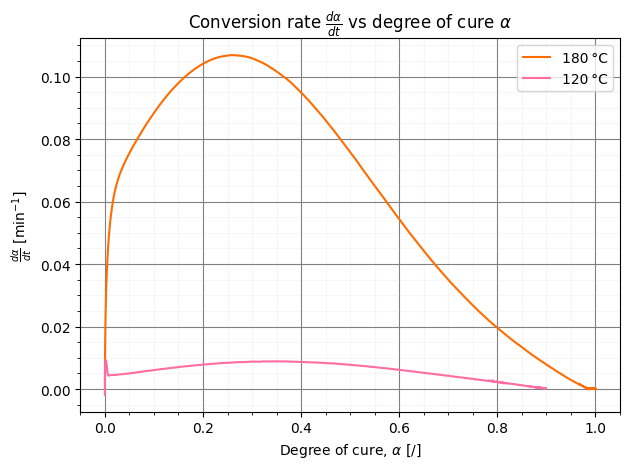

In [71]:
time180  = time_norm11.values          # 180 °C trace

alpha180 = norm11

time120  = time_norm13.values          # 120 °C trace

alpha120 = norm13

dadt180 = np.gradient(alpha180, time180)   # [1/min]

dadt120 = np.gradient(alpha120, time120)   # [1/min]


#Plot
plt.figure()
plt.plot(alpha180, dadt180, color=main_color)      # 180 °C
plt.plot(alpha120, dadt120, color=analog_color2)   # 120 °C
plt.title('Conversion rate $\\frac{d\\alpha}{dt}$ vs degree of cure $\\alpha$')
plt.xlabel('Degree of cure, $\\alpha$ [/]')
plt.ylabel(r'$\frac{d\alpha}{dt}$ [$\mathrm{min^{-1}}$]')
plt.legend(['180 °C', '120 °C'])
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor',
         color='lightgrey', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()


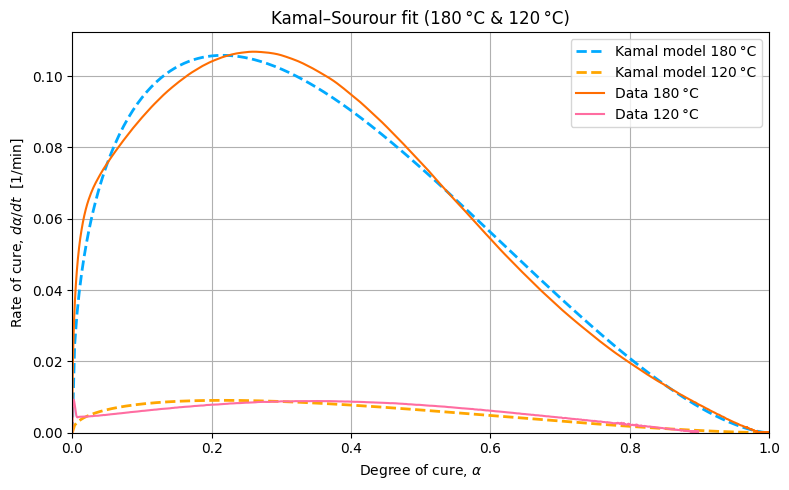

In [76]:
alphagrid = np.linspace(0, 1, 300)

plt.figure(figsize=(8, 5))

# Model curves
plt.plot(alphagrid,

         kamal(opt.x, alphagrid, 453, A1, Ea),

         '--', lw=2, label='Kamal model 180 °C', color=complementary_color)
plt.plot(alphagrid,

         kamal(opt.x, alphagrid, 393, A1, Ea),

         '--', lw=2, label='Kamal model 120 °C', color=analog_color1)

# Experimental points
plt.plot(alpha180, dadt180, ms=14, label='Data 180 °C',  color=main_color)
plt.plot(alpha120, dadt120, ms=14, label='Data 120 °C',  color=analog_color2)
plt.xlabel(r'Degree of cure, $\alpha$')
plt.ylabel(r'Rate of cure, $d\alpha/dt$  [1/min]')
plt.title('Kamal–Sourour fit (180 °C & 120 °C)')
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Comment:

The activation energy $E_1$ and pre-exponential factor $A_1$ were estimated from the linear relationship between $\ln(d\alpha/dt)$ and $1/T$, assuming very low degrees of cure ($\alpha \to 0$) where $k_2 \approx 0$. This simplifies the Kamal model to:

$$
\frac{d\alpha}{dt} = k_1 = A_1 e^{-E_1/RT}
$$

This follows a straight-line form $y = mx + c$, showing that higher temperatures lead to faster reaction rates. The resulting $E_1$ and $A_1$ values were used to fit the full model to the experimental data, which shows good agreement overall. Minor discrepancies can be attributed to experimental noise and numerical approximations.


#### Question 5.3: The model you just made should be able to describe the behaviour of the resin at a cure temperature of $150^\circ$ C. Verify whether your model is able to estimate the behaviour of the resin at this cure temperature by generating a graph $\frac{d\alpha}{dt}$ vs degree of cure $\alpha$ for both the experimental data from Question 1 and your model. Finally, comment on the plot you obtained and on the accuracy of your model.

Optimised parameters
  E2 = 6.133e+04  J/mol
  A2 = 3.722e+06  1/min
   m = 0.4567
   n = 1.6280


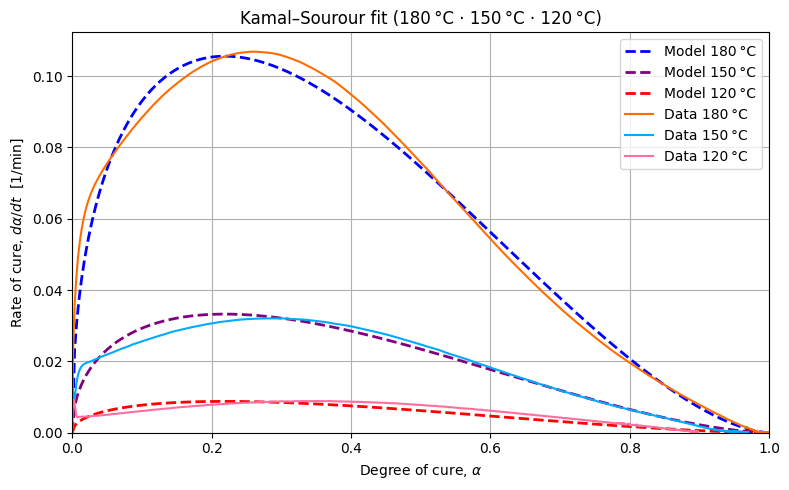

In [79]:
time150  = time_norm12.values                    # minutes
alpha150 = norm12

#function to have no infinites or nans
def clean(alpha, dadt, eps=1e-10):
    alpha = np.clip(alpha, 0.0, 1.0 - eps)
    mask  = np.isfinite(dadt)
    return alpha[mask], dadt[mask]

#run variables through filter
alpha180, dadt180 = clean(alpha180, dadt180)
alpha150, dadt150 = clean(alpha150, dadt150)
alpha120, dadt120 = clean(alpha120, dadt120)

#run optmizer
opt = least_squares(
        residuals, p0,
        args=(alpha180, dadt180,
              alpha150, dadt150,
              alpha120, dadt120,
              A1, Ea),
        bounds=bounds
      )

#dα/dt
dadt150 = np.gradient(alpha150, time150)
eps = 1e-10
alpha150 = np.clip(alpha150, 0.0, 1.0 - eps)
mask150  = np.isfinite(dadt150)
alpha150, dadt150 = alpha150[mask150], dadt150[mask150]

#3 temperatires
def residuals(p, a180, r180, a150, r150, a120, r120, A1, Ea):
    res180 = kamal(p, a180, 453, A1, Ea) - r180
    res150 = kamal(p, a150, 423, A1, Ea) - r150
    res120 = kamal(p, a120, 393, A1, Ea) - r120
    return np.concatenate((res180, res150, res120))
opt = least_squares(
        residuals, p0,
        args=(alpha180, dadt180, alpha150, dadt150,
              alpha120, dadt120, A1, Ea),
        bounds=bounds
      )

E2_opt, A2_opt, m_opt, n_opt = opt.x
print('Optimised parameters')
print(f'  E2 = {E2_opt:.4g}  J/mol')
print(f'  A2 = {A2_opt:.4g}  1/min')
print(f'   m = {m_opt:.4f}')
print(f'   n = {n_opt:.4f}')

alphagrid = np.linspace(0, 1, 300)

plt.figure(figsize=(8, 5))

# model curves
plt.plot(alphagrid, kamal(opt.x, alphagrid, 453, A1, Ea),
         '--', lw=2, label='Model 180 °C', color='blue')
plt.plot(alphagrid, kamal(opt.x, alphagrid, 423, A1, Ea),
         '--', lw=2, label='Model 150 °C', color='purple')
plt.plot(alphagrid, kamal(opt.x, alphagrid, 393, A1, Ea),
         '--', lw=2, label='Model 120 °C', color='red')
# experimental points
plt.plot(alpha180, dadt180, ms=2, label='Data 180 °C',  color=main_color)
plt.plot(alpha150, dadt150, ms=2, label='Data 150 °C',  color=complementary_color)
plt.plot(alpha120, dadt120, ms=2, label='Data 120 °C',  color=analog_color2)
plt.xlabel(r'Degree of cure, $\alpha$')
plt.ylabel(r'Rate of cure, $d\alpha/dt$  [1/min]')
plt.title('Kamal–Sourour fit (180 °C · 150 °C · 120 °C)')
plt.xlim(0, 1);  plt.ylim(bottom=0)
plt.grid(True);   plt.legend();   plt.tight_layout()
plt.show()

Comment:

The kinetic parameters from the 180°C and 120°C data were used to predict the cure behavior at 150°C using the Kamal model. The resulting curve shows good agreement with the experimental data, supporting the model’s validity for this resin. Including the 150°C data in the fitting could have improved the result further, but the overall match across all temperatures confirms the reliability of the extracted parameters.